In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee_id = [f"EMP{str(i)}" for i in range(1, 31)]
print(employee_id)

['EMP1', 'EMP2', 'EMP3', 'EMP4', 'EMP5', 'EMP6', 'EMP7', 'EMP8', 'EMP9', 'EMP10', 'EMP11', 'EMP12', 'EMP13', 'EMP14', 'EMP15', 'EMP16', 'EMP17', 'EMP18', 'EMP19', 'EMP20', 'EMP21', 'EMP22', 'EMP23', 'EMP24', 'EMP25', 'EMP26', 'EMP27', 'EMP28', 'EMP29', 'EMP30']


In [3]:
dates = pd.date_range(start="2025-07-07", periods=7)
print(dates)

DatetimeIndex(['2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-12', '2025-07-13'],
              dtype='datetime64[ns]', freq='D')


In [4]:
data = []
for emp in employee_id:
    for date in dates:
        hours = np.round(np.random.uniform(4, 10), 2)
        data.append({"EmployeeID": emp, "Date": date, "Working Hours": hours})
df = pd.DataFrame(data)
print(df.head())

  EmployeeID       Date  Working Hours
0       EMP1 2025-07-07           7.42
1       EMP1 2025-07-08           5.94
2       EMP1 2025-07-09           4.38
3       EMP1 2025-07-10           6.45
4       EMP1 2025-07-11           8.41


In [5]:

print(df.describe())
print(df.isnull().sum())

                      Date  Working Hours
count                  210     210.000000
mean   2025-07-10 00:00:00       7.029762
min    2025-07-07 00:00:00       4.090000
25%    2025-07-08 00:00:00       5.542500
50%    2025-07-10 00:00:00       6.925000
75%    2025-07-12 00:00:00       8.465000
max    2025-07-13 00:00:00       9.920000
std                    NaN       1.722192
EmployeeID       0
Date             0
Working Hours    0
dtype: int64


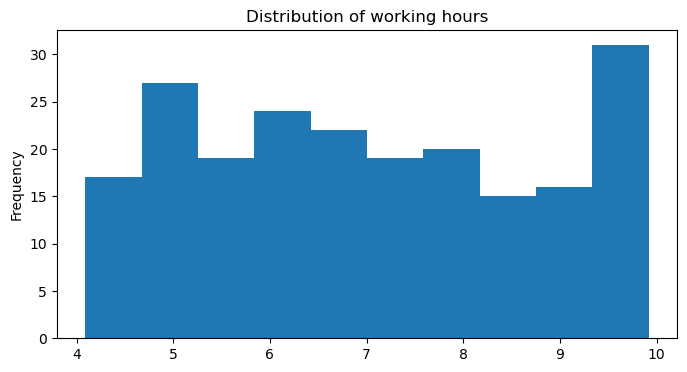

In [6]:
df["Working Hours"].plot(kind="hist",bins=10,title="Distribution of working hours",figsize=(8,4))
plt.show()

In [7]:
weekly_hours=df.groupby("EmployeeID")["Working Hours"].sum().reset_index()
weekly_hours.columns=["EmployeeID","Total Hours"]

In [8]:
avg_hours = df.groupby("EmployeeID")["Working Hours"].mean().reset_index()
avg_hours.columns = ["EmployeeID", "AvgDailyHours"]

In [9]:
summary = pd.merge(weekly_hours, avg_hours, on="EmployeeID")
summary["Anomaly"] = summary["Total Hours"].apply(lambda x: "Low" if x < 35 else ("High" if x > 65 else "Normal"))
summary.head()
print(summary.head())

  EmployeeID  Total Hours  AvgDailyHours Anomaly
0       EMP1        47.57       6.795714  Normal
1      EMP10        47.46       6.780000  Normal
2      EMP11        48.54       6.934286  Normal
3      EMP12        56.58       8.082857  Normal
4      EMP13        50.30       7.185714  Normal


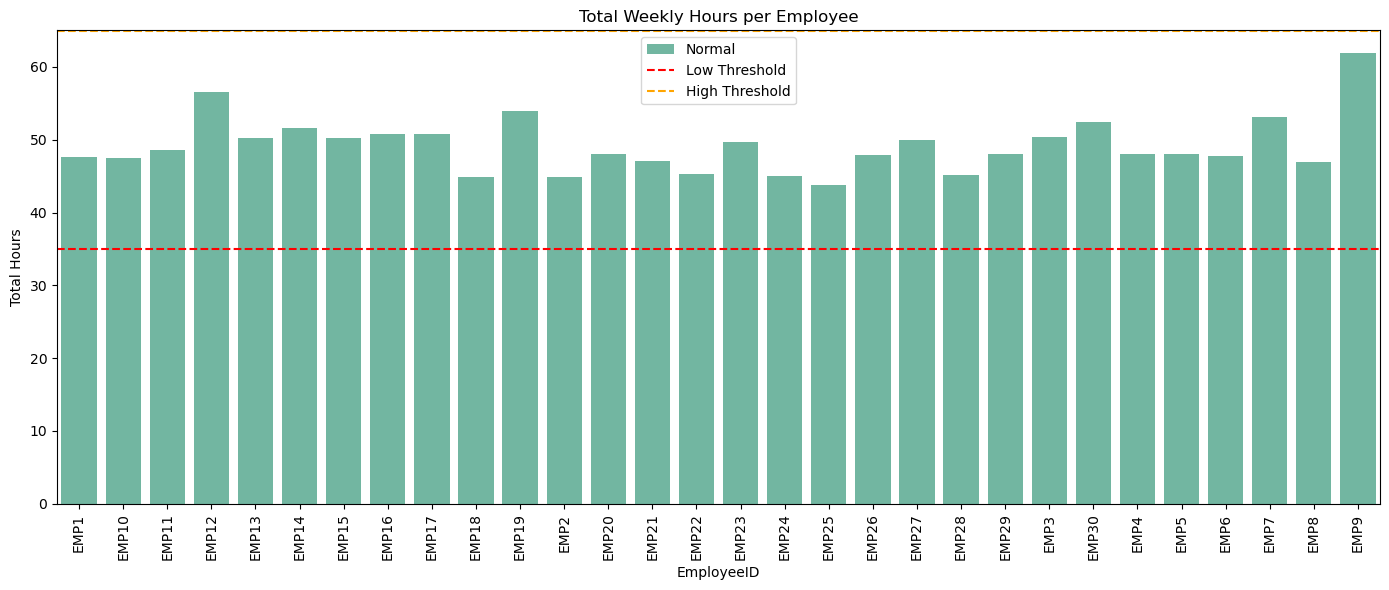

In [10]:
plt.figure(figsize=(14, 6))
sns.barplot(data=summary, x="EmployeeID", y="Total Hours", hue="Anomaly", palette="Set2")
plt.axhline(35, color="red", linestyle="--", label="Low Threshold")
plt.axhline(65, color="orange", linestyle="--", label="High Threshold")
plt.title("Total Weekly Hours per Employee")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

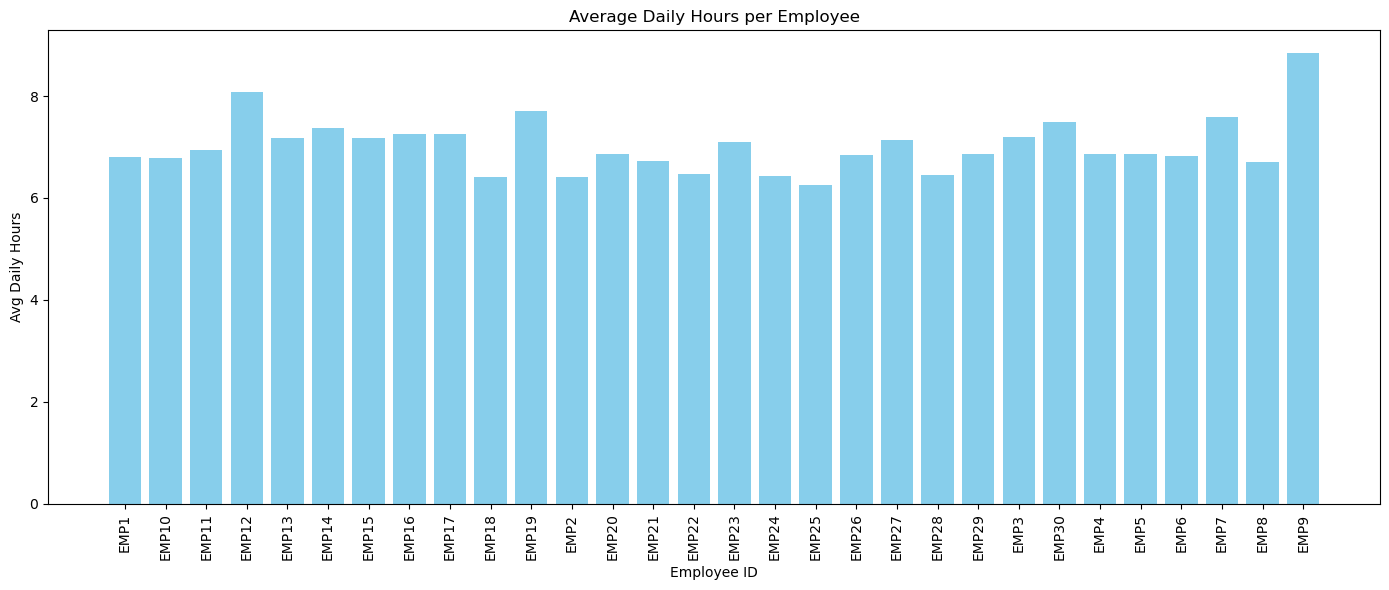

In [11]:
plt.figure(figsize=(14, 6))
plt.bar(summary["EmployeeID"], summary["AvgDailyHours"], color='skyblue')
plt.title("Average Daily Hours per Employee")
plt.xlabel("Employee ID")
plt.ylabel("Avg Daily Hours")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()